In [1]:
import sys
# C:\Users\jokemjaa\Documents\GitHub\jupyter\jedit
sys.path.append("C:\\users\\jokemjaa\\Documents\\github\\")
import jupyter_cell_magics.jedit as jedit


Jupyter cell magics load start
Jupyter cell magics load end


In [3]:
from skimage import data, io, filters


In [4]:
io.find_available_plugins()

{'fits': ['imread', 'imread_collection'],
 'gdal': ['imread', 'imread_collection'],
 'gtk': ['imshow'],
 'imageio': ['imread', 'imsave', 'imread_collection'],
 'imread': ['imread', 'imsave', 'imread_collection'],
 'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'qt': ['imshow', 'imsave', 'imread', 'imread_collection'],
 'simpleitk': ['imread', 'imsave', 'imread_collection'],
 'tifffile': ['imread', 'imsave', 'imread_collection']}

In [5]:
io.use_plugin('matplotlib')
# io.use_plugin('gtk')

In [126]:
# sulkava = io.imread(r'C:\Users\jokemjaa\OneDrive - Tieto Corporation\Notebooks\Sulkava1.png')
from skimage import color
sulkava = io.imread(r'G:\jokemjaaPublic\misc\mikki.jpg')
img = color.rgb2hsv(sulkava)

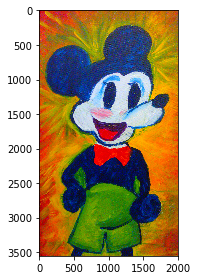

In [128]:
io.imshow(color.hsv2rgb(img))

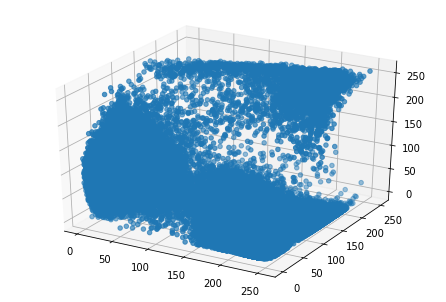

In [121]:
from mpl_toolkits.mplot3d import Axes3D
r, g, b = sulkava[::10,::10,0], sulkava[::10,::10,1], sulkava[::10,::10,2]
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [129]:
myData =  img.reshape((img.shape[0] * img.shape[1], 3))
myData.shape

(7096896, 3)

In [130]:
kmeans = KMeans(n_clusters=24)

In [131]:
kmeans.fit(myData[::300])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=24, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

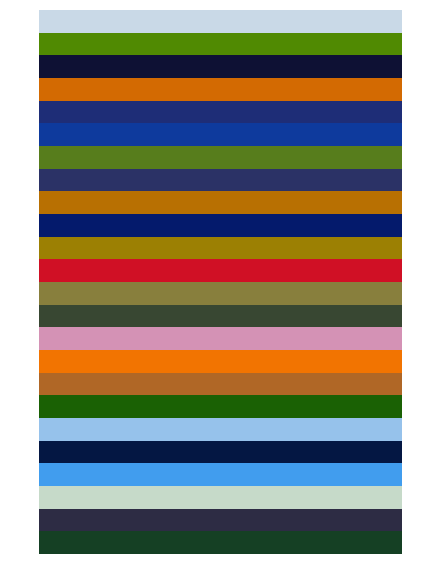

(2400, 1600, 3)

In [144]:
import numpy as np
kmeans.inertia_
vars(kmeans)
kmeans.cluster_centers_[0]

import matplotlib.pyplot as plt

myImage = np.zeros([400 * kmeans.n_clusters, 400, 3], dtype = np.float32)
for i in range(kmeans.n_clusters):
    myColor = np.array(kmeans.cluster_centers_[i])
    myImage[400 * i: 400 * (i + 1), 0:400] = myColor
myImage = myImage.reshape(int(myImage.shape[0] / 4), 1600, 3)
# myRow = np.array(100 * [myColor])
# myImage = np.array(100 * [myRow])
# f, axs = plt.subplots(2,2,figsize=(15,15))
# io.imshow()
plt.figure(figsize=(10,10))
plt.imshow(color.hsv2rgb(myImage)) # display the image
plt.axis('off')
plt.show()

myImage.shape

C:\Users\jokemjaa\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


TypeError: Invalid dimensions for image data

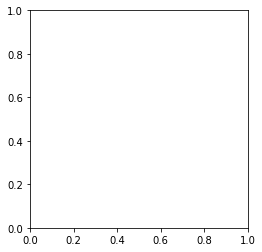

In [13]:
sulkava.shape # (720, 1280, 3)
from sklearn.cluster import KMeans

(921600, 3)

In [1]:
image = data.coins()
# ... or any other NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
io.show()

<Figure size 640x480 with 1 Axes>

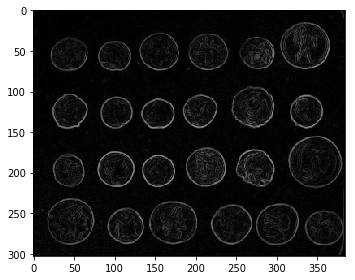

In [13]:
io.imshow(edges)
io.show()

In [14]:

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
image = img_as_float(data.coins())
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

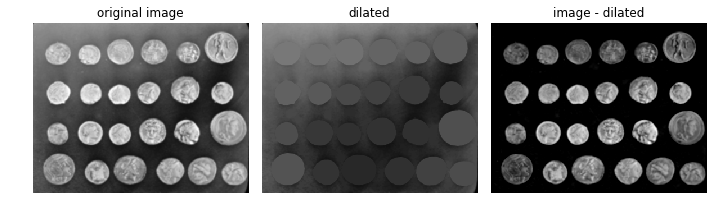

In [18]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(10, 4.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

In [7]:
io.imsave('coins_pil.png', edges)

C:\Users\jokemjaa\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [20]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import rescale_intensity

image = data.moon()
# Rescale image intensity so that we can see dim features.
image = rescale_intensity(image, in_range=(50, 200))


In [38]:
import numpy as np
from skimage.morphology import reconstruction

seed = np.copy(image)
seed[1:-1, 1:-1] = image.max()
mask = image

filled = reconstruction(seed, mask, method='erosion')


In [153]:
import matplotlib
imageNames = [name for name in globals().keys() if type(globals()[name]) == np.ndarray and 'plt' in name]
for name in imageNames:
    filePath = "./templates/" + name + ".png"
    print(filePath)
    plt.imsave(filePath, globals()[name], cmap=plt.cm.nipy_spectral)
#     ret = io.imshow((globals()[name]), cmap=plt.cm.gray, interpolation='nearest')

jedit.setGlobals(imageNames = imageNames)

./templates/plt_image.png
./templates/plt_distance.png
./templates/plt_labels.png


https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

In [154]:
%%jedit -h -o temp.html 
<center>
{% for name in imageNames %}
<p>{{ name }}</p>
<img src = "{{ name }}.png"></img>
{% endfor %}
</center>

Rendering with arguments {'imageNames': ['plt_image', 'plt_distance', 'plt_labels']}
<center>

<p>plt_image</p>
<img src = "plt_image.png"></img>

<p>plt_distance</p>
<img src = "plt_distance.png"></img>

<p>plt_labels</p>
<img src = "plt_labels.png"></img>

</center>
Opening page file:///C:\Users\jokemjaa\Google Drive\python\Jupyter\notebooks\stillVideos\templates/temp.html in the browser


In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((800, 800))
x1, y1, x2, y2 = 200, 200, 440, 520
x3, y3, x4, y4 = 600, 280, 240, 520
r1, r2 = 160, 200
r3, r4 = 120, 80
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
mask_circle3 = (x - x3)**2 + (y - y3)**2 < r2**2
mask_circle4 = (x - x4)**2 + (y - y4)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)
image = np.logical_or(image, mask_circle3)
image = np.logical_or(image, mask_circle4)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image) / 200
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((20, 20)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(- distance, markers, mask=image)

plt_image = image
plt_distance = - distance
plt_labels = labels


In [88]:
plt_lables = None